# **Efficient Portfolio Frontier using PyPortfolioOpt library of Python**


### Importing necessary libraries

In [1]:
import numpy as np  #for linear algebra (matrix) operations
import pandas as pd #to get data

In [2]:
!pip install pyportfolioopt #Installing pyportfolioopt library

In [29]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# **Getting data directly from Yahoo Finance**

### In 1st part, I used to assets - Tesla, and Google stock data to find optimal portfolio. In 2nd part, I added commodity (corn) to Portfolio.

## **Part 1**: Creating Efficient Portfolio Frontier without commodity

In [4]:
assets = ["TSLA","GOOGL"]
df = pd.DataFrame()
for stock in assets:
    df[stock] = wb.DataReader(stock,data_source='yahoo',start='2020-05-01')['Adj Close']

In [5]:
#First 10 rows of data (Adj Close)
df.head(10)

,TSLA,GOOGL
Date,,
2020-05-01,140.264008,1317.319946
2020-05-04,152.238007,1322.900024
2020-05-05,153.641998,1349.020020
2020-05-06,156.516006,1345.430054
2020-05-07,156.007996,1369.280029
2020-05-08,163.884003,1384.339966
2020-05-11,162.257996,1403.589966
2020-05-12,161.882004,1375.180054
2020-05-13,158.192001,1348.329956


## **Visualization**

Text(0.5, 1.0, 'Historical Stock Prices')

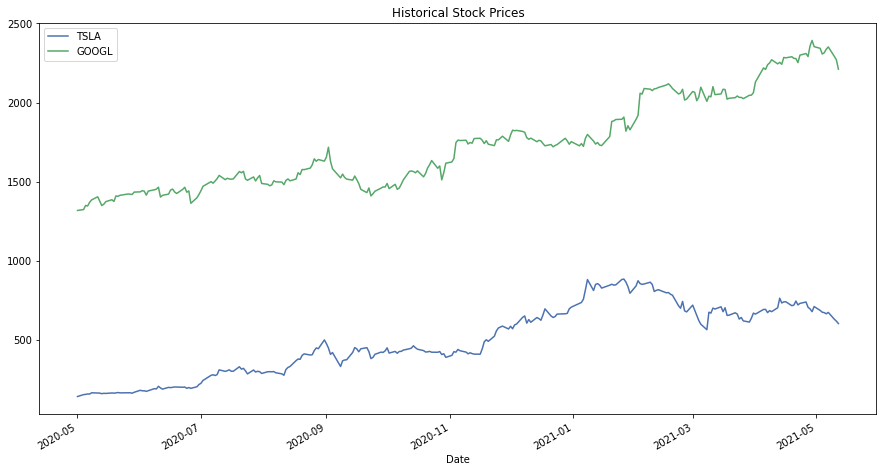

In [6]:
df.plot(figsize=(15, 8))
plt.title('Historical Stock Prices')

<AxesSubplot:xlabel='Date'>

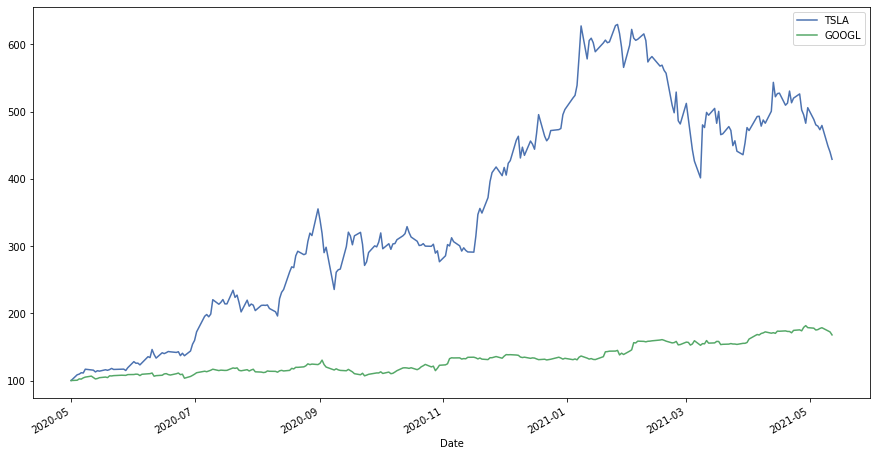

In [7]:
(df/ df.iloc[0] * 100).plot(figsize=(15, 8))

## **Finding natural logarithm of returns**

In [8]:
log_returns = np.log(df/df.shift(1))
log_returns.head(10)

,TSLA,GOOGL
Date,,
2020-05-01,NaN,NaN
2020-05-04,0.081919,0.004227
2020-05-05,0.009180,0.019552
2020-05-06,0.018533,-0.002665
2020-05-07,-0.003251,0.017571
2020-05-08,0.049252,0.010938
2020-05-11,-0.009971,0.013810
2020-05-12,-0.002320,-0.020449
2020-05-13,-0.023058,-0.019718


## **Finding mean of returns**
### **Note:** To get annualized mean of return I multiplied daily mean by the number of trading days in one year - 252

In [9]:
mean = log_returns.mean()*252
mean

TSLA     1.416980
GOOGL    0.503841
dtype: float64

## **Finding standard deviation of returns**
### I considered data as sample, therefore I set degree of freedom 1 (ddof=1) to calculate sample covariance

In [10]:
S=log_returns.cov(ddof=1)*252
S

,TSLA,GOOGL
TSLA,0.519174,0.074854
GOOGL,0.074854,0.079882


## **Correlation**

In [11]:
log_returns.corr()

,TSLA,GOOGL
TSLA,1.000000,0.367566
GOOGL,0.367566,1.000000


## **Creating Efficient Frontier**

In [26]:
# Initializing Efficient Frontier
ef = EfficientFrontier(mean,S)
#Adding constraint (sum of weights must be 1)
ef.add_constraint(lambda w: w[0]+w[1] == 1)

## **Generating random portfolios to find optimal one and visualizing results**

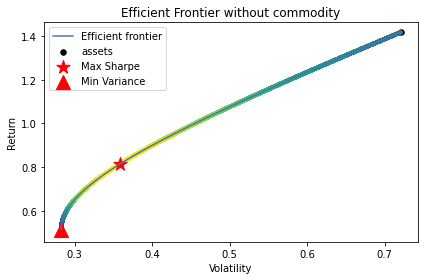

In [13]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()


# Generate random portfolios
n_samples = 30000
w = np.random.dirichlet(np.ones(len(mean)), n_samples)
returns = w.dot(mean)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpe_ratios = returns / stds
min_var, min_var_ret = stds.min(), returns[np.argmin(stds)]


ax.scatter(stds, returns, marker=".", c=sharpe_ratios, cmap="viridis")
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")
ax.scatter(min_var, min_var_ret, marker='^', s=200, c="r", label="Min Variance")

# Output
ax.set_title("Efficient Frontier without commodity")
ax.legend()
plt.tight_layout()
plt.show()

### Performance of the optimal portfolio

In [14]:
 ef.portfolio_performance(verbose=True)

Expected annual return: 81.4%
Annual volatility: 35.8%
Sharpe Ratio: 2.22


(0.8138772683461262, 0.3581460986698535, 2.2166296695526446)

In [15]:
print('Weight of 1st stock: {}%, weight of 2nd stock: {}%'.format(np.round(ef.weights[0]*100,2),np.round(ef.weights[1]*100,2)))

Weight of 1st stock: 33.95%, weight of 2nd stock: 66.05%


## **Part 2**: Creating Efficient Portfolio Frontier with commodity

In [16]:
assets2 = ["TSLA","GOOGL",'ZC=F']
df2 = pd.DataFrame()
for stock in assets2:
    df2[stock] = wb.DataReader(stock,data_source='yahoo',start='2020-05-01')['Adj Close']

## **Calculating logarthmic returns, annualized mean and standard devation of logarthmic returns**

In [17]:
log_returns2 = np.log(df2/df2.shift(1))
mean2 = log_returns2.mean()*252
S2=log_returns2.cov(ddof=1)*252

## **Correlation**

In [18]:
log_returns2.corr()

,TSLA,GOOGL,ZC=F
TSLA,1.000000,0.367527,0.066552
GOOGL,0.367527,1.000000,0.049725
ZC=F,0.066552,0.049725,1.000000


## **Visualization**

Text(0.5, 1.0, 'Historical Stock Prices')

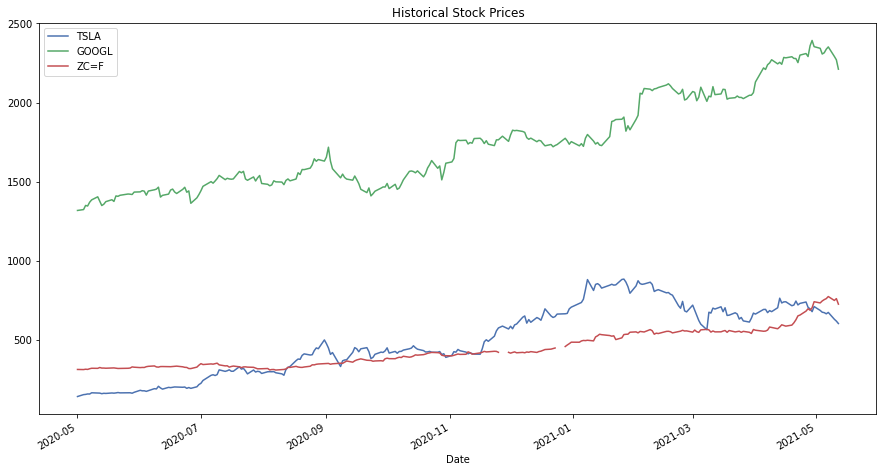

In [19]:
df2.plot(figsize=(15, 8))
plt.title('Historical Stock Prices')

<AxesSubplot:xlabel='Date'>

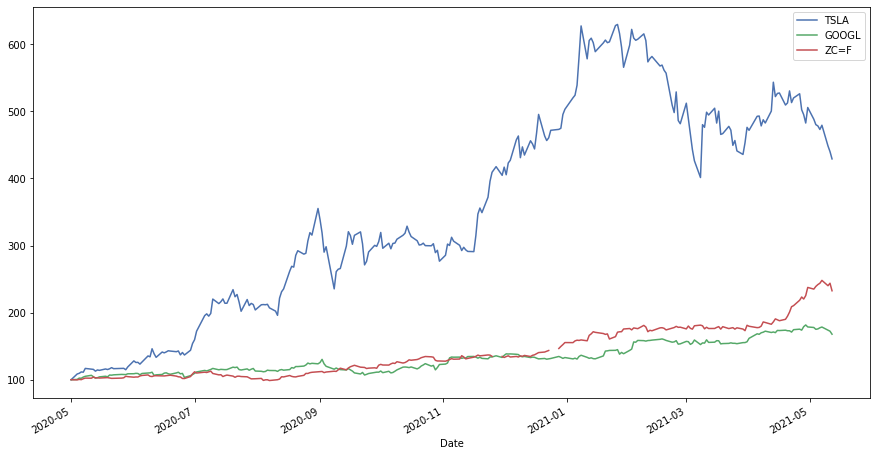

In [20]:
(df2/ df2.iloc[0] * 100).plot(figsize=(15, 8))

## **Creating Efficient Frontier**

In [27]:
# Initializing Efficient Frontier
ef2 = EfficientFrontier(mean2,S2)
#Adding constraint (sum of weights must be 1)
ef2.add_constraint(lambda w2: w2[0]+w2[1]+w2[2]== 1)

## **Generating random portfolios to find optimal one and visualizing results**

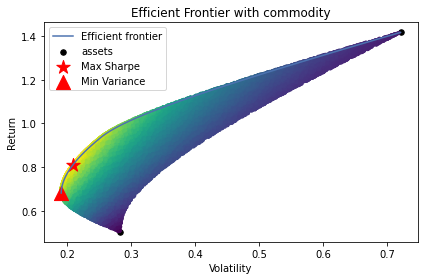

In [22]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True, c='r')

# Find the tangency portfolio
ef2.max_sharpe()
ret_tangent2, std_tangent2, _ = ef2.portfolio_performance()


# Generate random portfolios
n_samples = 30000
w2 = np.random.dirichlet(np.ones(len(mean2)), n_samples)
returns2 = w2.dot(mean2)
stds2 = np.sqrt(np.diag(w2 @ S2 @ w2.T))
sharpe_ratios2 = returns2 / stds2
min_var2, min_var_ret2 = stds2.min(), returns2[np.argmin(stds2)]

ax.scatter(stds2, returns2, marker=".", c=sharpe_ratios2, cmap="viridis")
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Max Sharpe")
ax.scatter(min_var2, min_var_ret2, marker='^', s=200, c="r", label="Min Variance")

# Output
ax.set_title("Efficient Frontier with commodity")
ax.legend()
plt.tight_layout()
plt.show()

### Performance of the optimal portfolio

In [23]:
 ef2.portfolio_performance(verbose=True)

Expected annual return: 81.2%
Annual volatility: 20.9%
Sharpe Ratio: 3.79


(0.8118216109328268, 0.20896067721656608, 3.7893331007545776)

In [24]:
print('Weight of 1st stock: {}%, weight of 2nd stock: {}%, weight of 3rd stock: {}%'.format(np.round(ef2.weights[0]*100,2),np.round(ef2.weights[1]*100,2),np.round(ef2.weights[2]*100,2)))

Weight of 1st stock: 10.27%, weight of 2nd stock: 20.79%, weight of 3rd stock: 68.95%


## **Comparing with and without commodity versions**

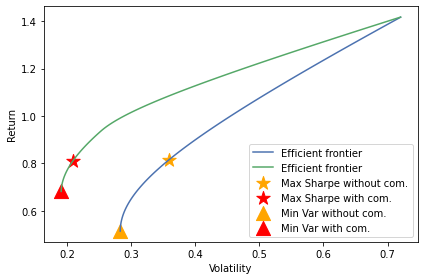

In [28]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="orange", label="Max Sharpe without com.",)
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Max Sharpe with com.")
ax.scatter(min_var, min_var_ret, marker='^', s=200, c="orange", label="Min Var without com.")
ax.scatter(min_var2, min_var_ret2, marker='^', s=200, c="r", label="Min Var with com.")
plt.legend(loc='lower right')

## **Result:** As we can see adding commodity (corn) made our efficient frontier better. 
### Without commodity sharpe ratio 2.22
### With commodity sharpe ratio 3.79